In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from sklearn.svm import OneClassSVM

In [3]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
%load_ext tensorboard

In [4]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [5]:
from IPython.display import Image
import os, datetime

In [6]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [7]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/luflow.csv'


Mounted at /content/drive


In [8]:
file_path_1 = '/content/drive/MyDrive/VIT/Dataset/CIC-DDoS2019/cic-ddos2019-parquet-preprocessed.csv'

In [9]:
# Step 1: Load the dataset from Google Drive
df1 = pd.read_csv(file_path_1)

column_names = df1.columns
print("Column Names df1 / Features:")
print(column_names)


Column Names df1 / Features:
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    

In [10]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['Label'].value_counts())
    print("\n\n\n")

In [11]:
%%time
dataProperties(df1, "DF1")

DF1
Number of rows (Samples):  203508
Number of columns (Features):  78
Label
Benign           97831
TFTP             19783
UDP              18090
DrDoS_NTP        12137
DrDoS_UDP        10420
Syn               9875
UDP-lag           8872
MSSQL             8523
DrDoS_MSSQL       6212
DrDoS_DNS         3669
DrDoS_SNMP        2717
LDAP              1906
DrDoS_LDAP        1440
Portmap            685
NetBIOS            644
DrDoS_NetBIOS      598
UDPLag              55
WebDDoS             51
Name: count, dtype: int64




CPU times: user 13 ms, sys: 123 µs, total: 13.1 ms
Wall time: 17.4 ms


In [12]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [13]:
%%time
network_data_d1 = dropInfNull(df1)

(203508, 78)
(203508, 78)
CPU times: user 101 ms, sys: 39.2 ms, total: 140 ms
Wall time: 138 ms


In [14]:
#Get the unique labels
unique_labels = network_data_d1['Label'].unique()

#Get the counts of each unique label
label_counts = network_data_d1['Label'].value_counts()

#Print the results

print("Unique Labels:")
print(unique_labels)

print("\nCounts of Each Label:")
print(label_counts)

Unique Labels:
['DrDoS_NTP' 'TFTP' 'Syn' 'MSSQL' 'LDAP' 'Benign' 'NetBIOS' 'UDP'
 'Portmap' 'UDPLag' 'DrDoS_DNS' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_SNMP'
 'UDP-lag' 'WebDDoS' 'DrDoS_NetBIOS' 'DrDoS_UDP']

Counts of Each Label:
Label
Benign           97831
TFTP             19783
UDP              18090
DrDoS_NTP        12137
DrDoS_UDP        10420
Syn               9875
UDP-lag           8872
MSSQL             8523
DrDoS_MSSQL       6212
DrDoS_DNS         3669
DrDoS_SNMP        2717
LDAP              1906
DrDoS_LDAP        1440
Portmap            685
NetBIOS            644
DrDoS_NetBIOS      598
UDPLag              55
WebDDoS             51
Name: count, dtype: int64


In [15]:
df_balanced = network_data_d1

**Understanding the Data Type of the Dataset**

In [16]:
# Access the dtypes attribute
feature_data_types = df_balanced.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
Protocol                      int64
Flow Duration                 int64
Total Fwd Packets             int64
Total Backward Packets        int64
Fwd Packets Length Total    float64
                             ...   
Idle Mean                   float64
Idle Std                    float64
Idle Max                    float64
Idle Min                    float64
Label                        object
Length: 78, dtype: object


In [17]:
df_balanced['Label'] = df_balanced['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

In [18]:
#Get the counts of each unique label
label_counts = df_balanced['Label'].value_counts()

#Print the results

print("\nCounts of Each Label:")
print(label_counts)



Counts of Each Label:
Label
1    105677
0     97831
Name: count, dtype: int64


**Drop Constant Column**

In [19]:
%%time
# drop the constant columns (which varience is 0)
variances = df_balanced.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = df_balanced.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')
(203508, 66)
CPU times: user 44.7 ms, sys: 7.79 ms, total: 52.5 ms
Wall time: 54.3 ms


**Drop Duplicate Column**

In [20]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

{'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'RST Flag Count', 'Subflow Fwd Packets', 'Subflow Bwd Packets'}
(203508, 61)


**Drop Columns based on correlation**

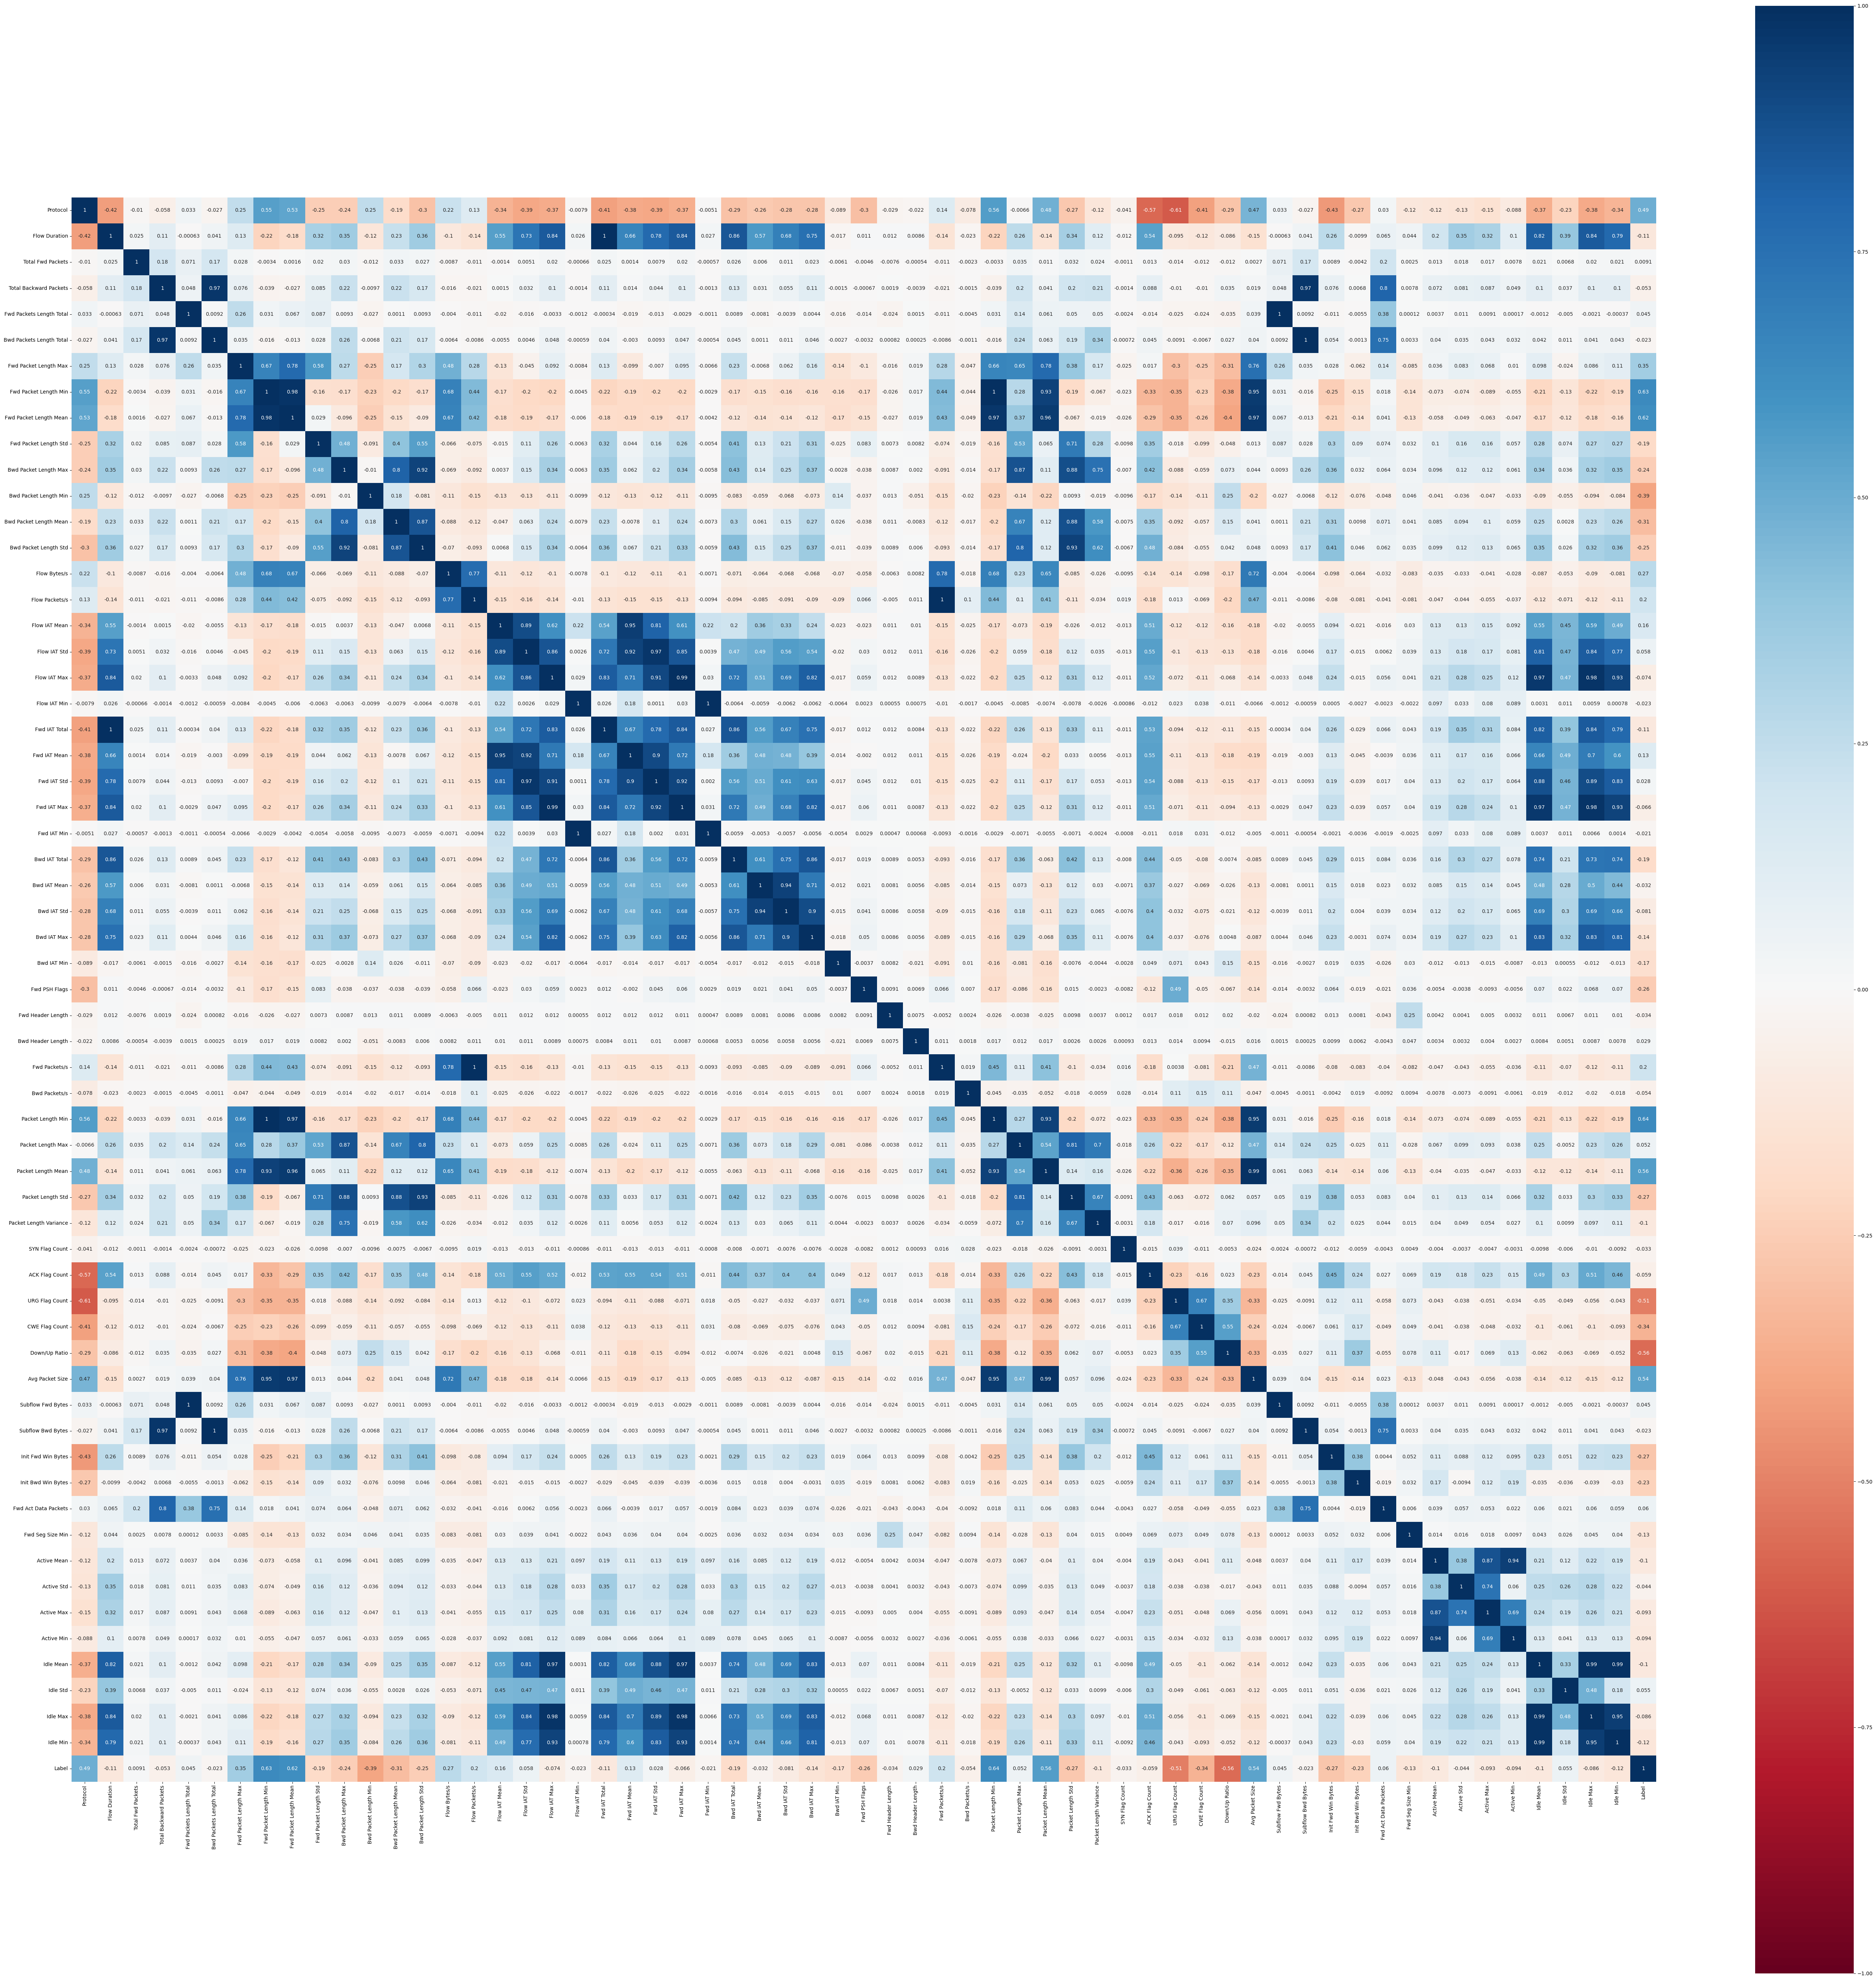

CPU times: user 6.37 s, sys: 277 ms, total: 6.64 s
Wall time: 6.58 s


In [21]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [22]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Flow IAT Mean', 'Fwd Packets Length Total', 'Bwd Packet Length Std', 'Flow IAT Min', 'Bwd IAT Mean', 'Packet Length Mean', 'Fwd IAT Mean', 'Fwd Packet Length Mean', 'Flow IAT Std', 'Fwd IAT Max', 'Flow Packets/s', 'Idle Max', 'Fwd IAT Std', 'Packet Length Min', 'Active Mean', 'Bwd Packets Length Total', 'Total Backward Packets', 'Flow IAT Max', 'Fwd Packet Length Min', 'Flow Duration', 'Idle Mean', 'Bwd Packet Length Max'}
22
CPU times: user 25 ms, sys: 1.72 ms, total: 26.7 ms
Wall time: 26.4 ms


In [23]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(203508, 39)
CPU times: user 9.37 ms, sys: 6.01 ms, total: 15.4 ms
Wall time: 14 ms


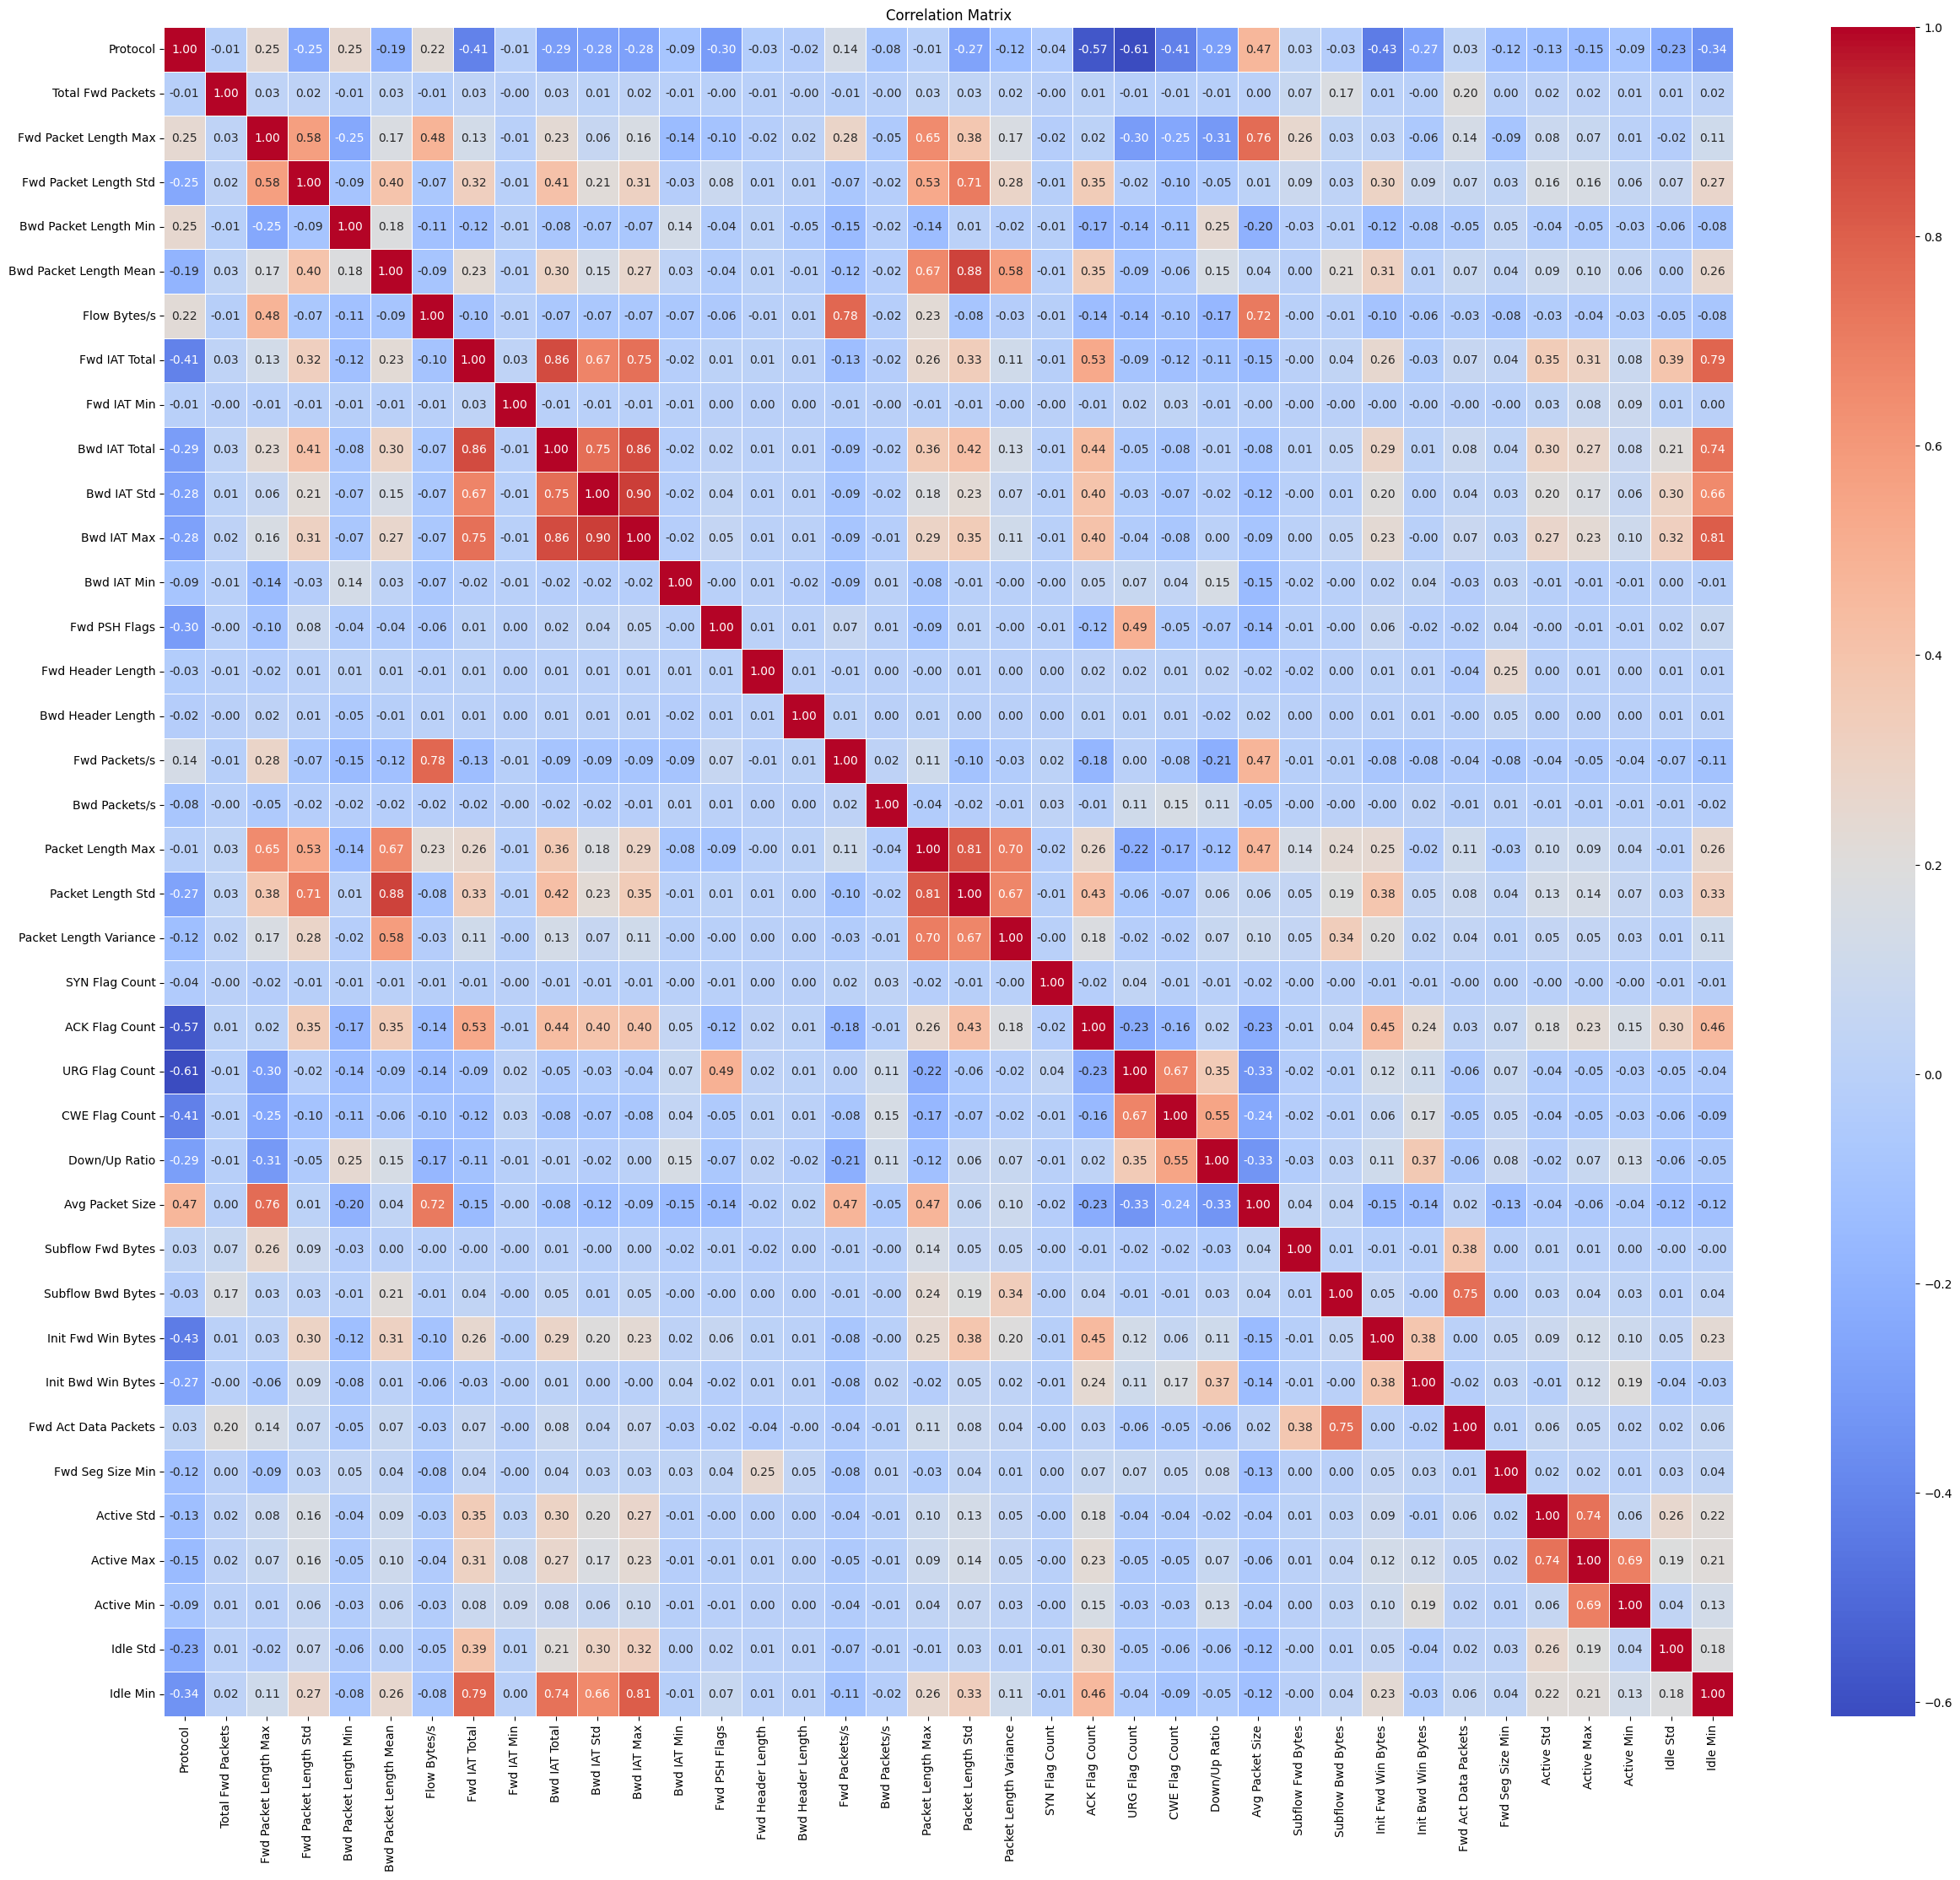

In [24]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop('Label', axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

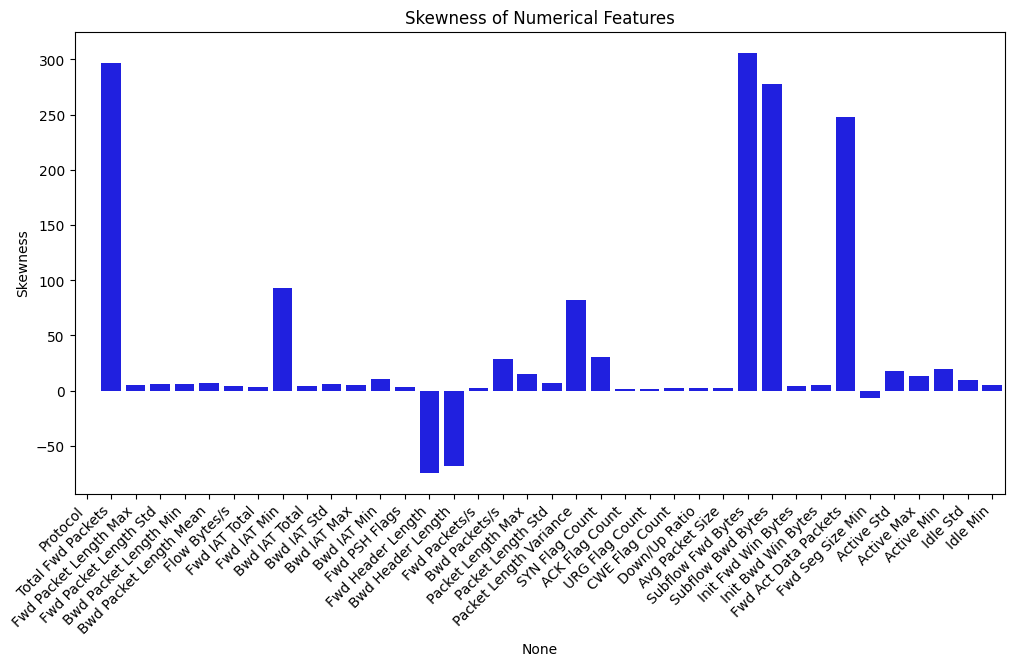

In [25]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop('Label', axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [26]:
%%time
X=df_balanced.drop(["Label"], axis=1)
y=df_balanced["Label"]

# split the data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

CPU times: user 58.4 ms, sys: 10.9 ms, total: 69.3 ms
Wall time: 68.1 ms


In [27]:
x_train

,Protocol,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Bytes/s,Fwd IAT Total,Fwd IAT Min,Bwd IAT Total,...,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Std,Idle Min
10790,17,114,440.0,0.000000,0.0,0.00000,4.549660e+06,11025.0,0.0,0.0,...,0,-1,-1,113,20,0.0,0.0,0.0,0.0,0.0
61313,17,6,393.0,35.088460,0.0,0.00000,9.826807e+03,212480.0,0.0,0.0,...,0,-1,-1,5,20,0.0,0.0,0.0,0.0,0.0
26925,17,4,516.0,0.000000,0.0,0.00000,6.888323e+02,2996375.0,1.0,0.0,...,0,-1,-1,3,-1,0.0,0.0,0.0,0.0,0.0
136032,17,2,1257.0,0.000000,0.0,0.00000,2.514000e+09,1.0,1.0,0.0,...,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0
123567,6,4,46.0,26.558113,0.0,23.00000,2.365951e+03,77770.0,1.0,5.0,...,92,258,311,1,20,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,17,2,1272.0,0.000000,0.0,0.00000,2.544000e+09,1.0,1.0,0.0,...,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0
103694,6,1,6.0,0.000000,6.0,6.00000,9.424084e+04,0.0,0.0,2.0,...,12,246,16421,0,20,0.0,0.0,0.0,0.0,0.0
131932,17,2,925.0,0.000000,0.0,0.00000,9.250000e+08,2.0,2.0,0.0,...,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0
146867,6,1,0.0,0.000000,0.0,0.00000,0.000000e+00,0.0,0.0,0.0,...,0,253,245,0,20,0.0,0.0,0.0,0.0,0.0


In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(x_train)

# Transform the testing set using the same scaler
x_test = scaler.transform(x_test)

In [29]:
# Filter x_train to keep only benign samples (where y_train is 0)
# Remember that x_train is already scaled
X_train_ocsvm = x_train[y_train == 0]

In [29]:
# Or using 'rbf' kernel with a specific gamma value
##model_ocsvm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.1)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM

# Define the parameter grid to search
param_grid = {
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'], # Experiment with different gamma values
    'nu': [0.01, 0.05, 0.1, 0.2, 0.5]            # Experiment with different nu values
}

# Initialize the OneClassSVM model
ocsvm = OneClassSVM(kernel='rbf') # Keep kernel as rbf or try others

# Initialize GridSearchCV
# Note: Scoring for OneClassSVM is tricky. You might need a custom scorer
# that reflects your evaluation metric (e.g., f1, roc_auc for the combined dataset).
# For initial tuning, you might rely on the default score or focus on validating
# on your test set.
# A simple approach for GridSearch *just on the training data* might not be ideal
# for anomaly detection. It's often better to evaluate hyperparameter performance
# on a validation set with both normal and anomaly samples.
# A more robust approach involves defining a custom scorer based on metrics
# like ROC AUC on a validation set.

# Example (conceptual) using a hypothetical scorer based on ROC AUC on a held-out set:
# from sklearn.metrics import make_scorer, roc_auc_score
# def roc_auc_scorer(estimator, X):
#     # This requires access to true labels, which isn't standard for fitting OneClassSVM
#     # GridSearchCV's fit method is typically on the *training* data (benign only here).
#     # A better approach is manual looping or using a pipeline with a scoring step.
#     pass # This approach is complex for standard GridSearchCV with OneClassSVM


# A simpler approach for GridSearchCV (understanding its limitations here):
# Fit GridSearchCV on the training data (benign only)
# This will score based on some internal metric, which may not directly
# optimize for your desired evaluation metrics on the test set.
# best_ocsvm = GridSearchCV(ocsvm, param_grid, scoring='???', cv=5) # What scoring to use?

# Recommendation: Manual tuning or a custom validation loop is often better
# for OneClassSVM hyperparameter selection based on test set performance (ROC AUC, F1).
# The code below shows how to evaluate manually for different parameters.

best_roc_auc = 0
best_gamma = None
best_nu = None

print("Starting manual hyperparameter search...")
for gamma in param_grid['gamma']:
    for nu in param_grid['nu']:
        print(f"Trying gamma={gamma}, nu={nu}...")
        model_ocsvm_tuned = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
        model_ocsvm_tuned.fit(X_train_ocsvm) # Train on benign data

        # Evaluate on the test set (which has both benign and anomaly)
        anomaly_scores_tuned = model_ocsvm_tuned.decision_function(x_test)
        # Negate scores for AUC calculation
        anomaly_scores_positive_tuned = -anomaly_scores_tuned

        # Calculate ROC AUC
        try:
            # Ensure y_test has at least one positive and one negative class
            if len(y_test.unique()) > 1:
                fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, anomaly_scores_positive_tuned)
                roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

                print(f"  ROC AUC: {roc_auc_tuned:.4f}")

                if roc_auc_tuned > best_roc_auc:
                    best_roc_auc = roc_auc_tuned
                    best_gamma = gamma
                    best_nu = nu
                    print(f"  New best found: ROC AUC = {best_roc_auc:.4f} with gamma={best_gamma}, nu={best_nu}")
            else:
                print("  Skipping ROC AUC calculation: Test set does not contain both classes.")
        except ValueError as e:
             print(f"  Could not calculate ROC AUC: {e}")
             # This might happen if predictions only contain one class, etc.

print("\nBest hyperparameters found:")
print(f"  Gamma: {best_gamma}")
print(f"  Nu: {best_nu}")
print(f"  Corresponding ROC AUC on test set: {best_roc_auc:.4f}")

# Now train the final model with the best hyperparameters
if best_gamma is not None and best_nu is not None:
     model_ocsvm_final = OneClassSVM(kernel='rbf', gamma=best_gamma, nu=best_nu)
     model_ocsvm_final.fit(X_train_ocsvm)
     print("\nFinal model trained with best hyperparameters.")
     # You can now evaluate this model_ocsvm_final on the test set
     # using the same metrics as before (confusion matrix, classification report, ROC AUC).
else:
    print("\nNo best hyperparameters found (possibly due to test set issues or errors).")

Starting manual hyperparameter search...
Trying gamma=0.01, nu=0.01...
  ROC AUC: 0.6545
  New best found: ROC AUC = 0.6545 with gamma=0.01, nu=0.01
Trying gamma=0.01, nu=0.05...
  ROC AUC: 0.5377
Trying gamma=0.01, nu=0.1...
  ROC AUC: 0.5462
Trying gamma=0.01, nu=0.2...
  ROC AUC: 0.5431
Trying gamma=0.01, nu=0.5...
  ROC AUC: 0.5457
Trying gamma=0.1, nu=0.01...
  ROC AUC: 0.9428
  New best found: ROC AUC = 0.9428 with gamma=0.1, nu=0.01
Trying gamma=0.1, nu=0.05...
  ROC AUC: 0.9732
  New best found: ROC AUC = 0.9732 with gamma=0.1, nu=0.05
Trying gamma=0.1, nu=0.1...
  ROC AUC: 0.9518
Trying gamma=0.1, nu=0.2...
  ROC AUC: 0.9024
Trying gamma=0.1, nu=0.5...
  ROC AUC: 0.7519
Trying gamma=1, nu=0.01...
  ROC AUC: 0.9782
  New best found: ROC AUC = 0.9782 with gamma=1, nu=0.01
Trying gamma=1, nu=0.05...
  ROC AUC: 0.9782
  New best found: ROC AUC = 0.9782 with gamma=1, nu=0.05
Trying gamma=1, nu=0.1...
  ROC AUC: 0.9746
Trying gamma=1, nu=0.2...
  ROC AUC: 0.9480
Trying gamma=1, nu=0

:# **Calculate the Metrics for One Class SVM**

In [31]:
# Isolation Forest provides a decision_function which gives anomaly scores.
# Lower scores indicate more anomalous instances.
anomaly_scores = model_ocsvm_final.decision_function(x_test)

# predict method gives a prediction (-1 for anomaly, 1 for inlier)
y_pred_svm = model_ocsvm_final.predict(x_test)

# Convert predictions to match your binary_label (0 for benign, 1 for anomaly)
# Isolation Forest predicts 1 for inliers (benign) and -1 for outliers (anomalies)
# So, we map 1 to 0 and -1 to 1
y_pred_binary_svm = [0 if pred == 1 else 1 for pred in y_pred_svm]

In [36]:
# Calculate and print the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_binary_svm)
print("Confusion Matrix for Isolation Forest:")
print(conf_matrix_svm)

Confusion Matrix for Isolation Forest:
[[17657  1932]
 [  190 20923]]


In [37]:
# Calculate and print the classification report
class_report_svm = classification_report(y_test, y_pred_binary_svm)
print("\nClassification Report for One Class SVM:")
print(class_report_svm)




Classification Report for One Class SVM:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     19589
           1       0.92      0.99      0.95     21113

    accuracy                           0.95     40702
   macro avg       0.95      0.95      0.95     40702
weighted avg       0.95      0.95      0.95     40702



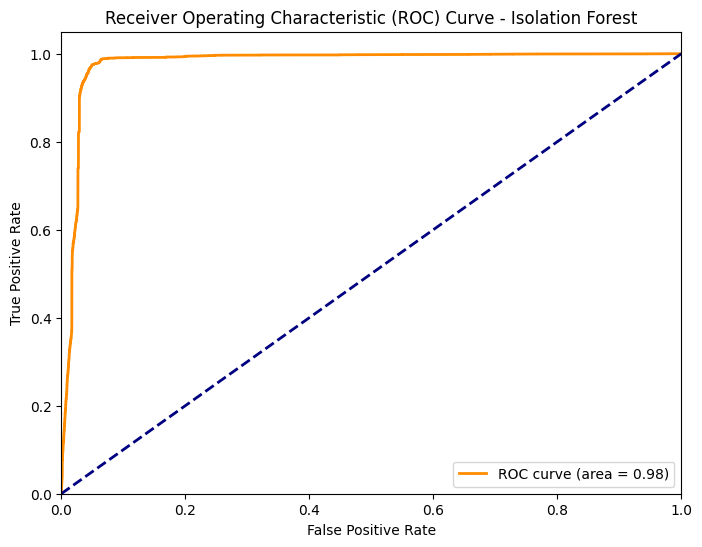

In [38]:
# For ROC curve, we need scores where higher values indicate the positive class (anomaly).
# The decision_function gives lower scores for anomalies. So, we can negate the scores
# or consider the absolute value, or simply understand that lower scores correspond to the positive class.
# Let's negate the scores so that higher values correspond to anomalies.
anomaly_scores_positive = -anomaly_scores

# Get the true labels for the test set
y_true = y_test # This is your original binary_label for the test set

# Calculate the ROC curve
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Threshold values
fpr, tpr, thresholds = roc_curve(y_true, anomaly_scores_positive)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Isolation Forest')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_svm.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 17657
False Positives (FP): 1932
False Negatives (FN): 190
True Positives (TP): 20923
